## Import anything you need for the lower cells, and set any defaults 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
titanic=sns.load_dataset('titanic')
titanic.head

<bound method NDFrame.head of      survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_mal

# Missing Data Exploration
a) Determine how much missing data there is for each variable, plotting it as a horizontal bar plot with seaborn

In [103]:
## sum the missing data value
missing=titanic.isnull().sum()
missing =pd.DataFrame(data=missing)
## name the missing data count column and reset index
missing.columns = ['count']
missing=missing.reset_index( )

missing

,index,count
0,survived,0
1,pclass,0
2,sex,0
3,age,177
4,sibsp,0
5,parch,0
6,fare,0
7,embarked,2
8,class,0
9,who,0


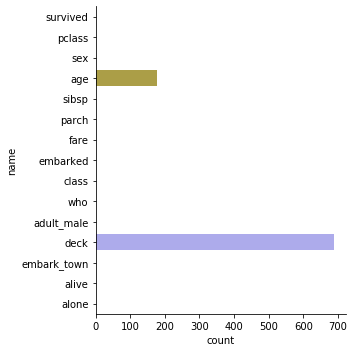

In [16]:

sns.catplot(data=missing,x="count",y="name",kind="bar")

b) Determine how much missing data there is for each passenger, and make a vertical bar plot according to the amount of missing data, separated by gender (there should be 3 bars, corresponding to “0”, “1”, and “2”)

In [17]:
## sum the missing data for each row
missing_pa=titanic.isnull().sum(axis=1)
## name the column
missing_pa =pd.DataFrame(data=missing_pa)
missing_pa.columns = ['missing']

missing_pa.head

<bound method NDFrame.head of      missing
0          1
1          0
2          1
3          0
4          1
..       ...
886        1
887        0
888        2
889        0
890        1

[891 rows x 1 columns]>

In [18]:
## add missing count column to titanic dataframe
titanic_missing=pd.merge(titanic, missing_pa,left_index=True, right_index=True)
titanic_missing.head

<bound method NDFrame.head of      survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_mal

In [19]:
titanic_mc=titanic_missing.groupby('missing')['sex'].value_counts()
titanic_mc=pd.DataFrame(data=titanic_mc)
titanic_mc.rename(columns={titanic.columns[2]:"count"},inplace =True)
titanic_mc.reset_index(level=['missing','sex'], inplace=True)
titanic_mc

,missing,sex,count
0,0,male,94
1,0,female,88
2,1,male,371
3,1,female,178
4,2,male,112
5,2,female,48


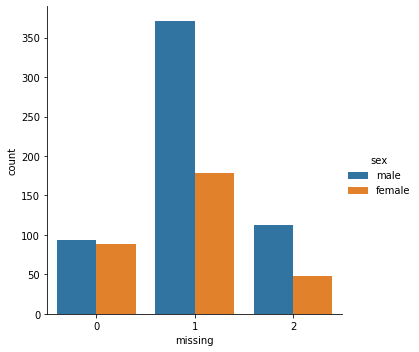

In [20]:
sns.catplot(data=titanic_mc,x="missing",y="count",hue="sex",kind="bar")

c) Put both axes on the same figure

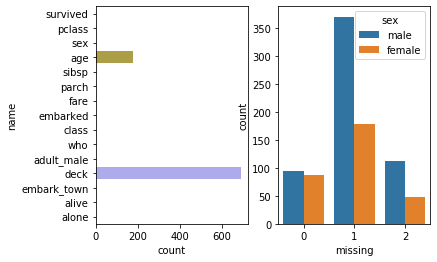

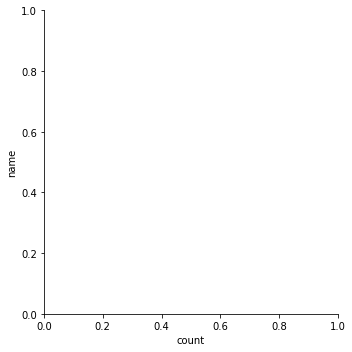

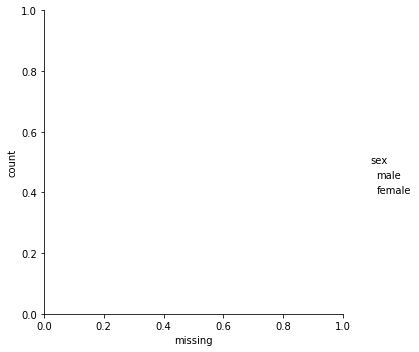

In [21]:

fig, (ax1, ax2) = plt.subplots(1,2)
sns.catplot(data=missing,x="count",y="name",kind="bar",ax=ax1)


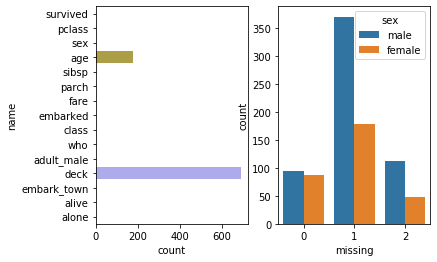

In [22]:
fig

## Survival Exploration
a) Create a pairplot for all numerical variables in the dataset (dropna for age), colored by survival

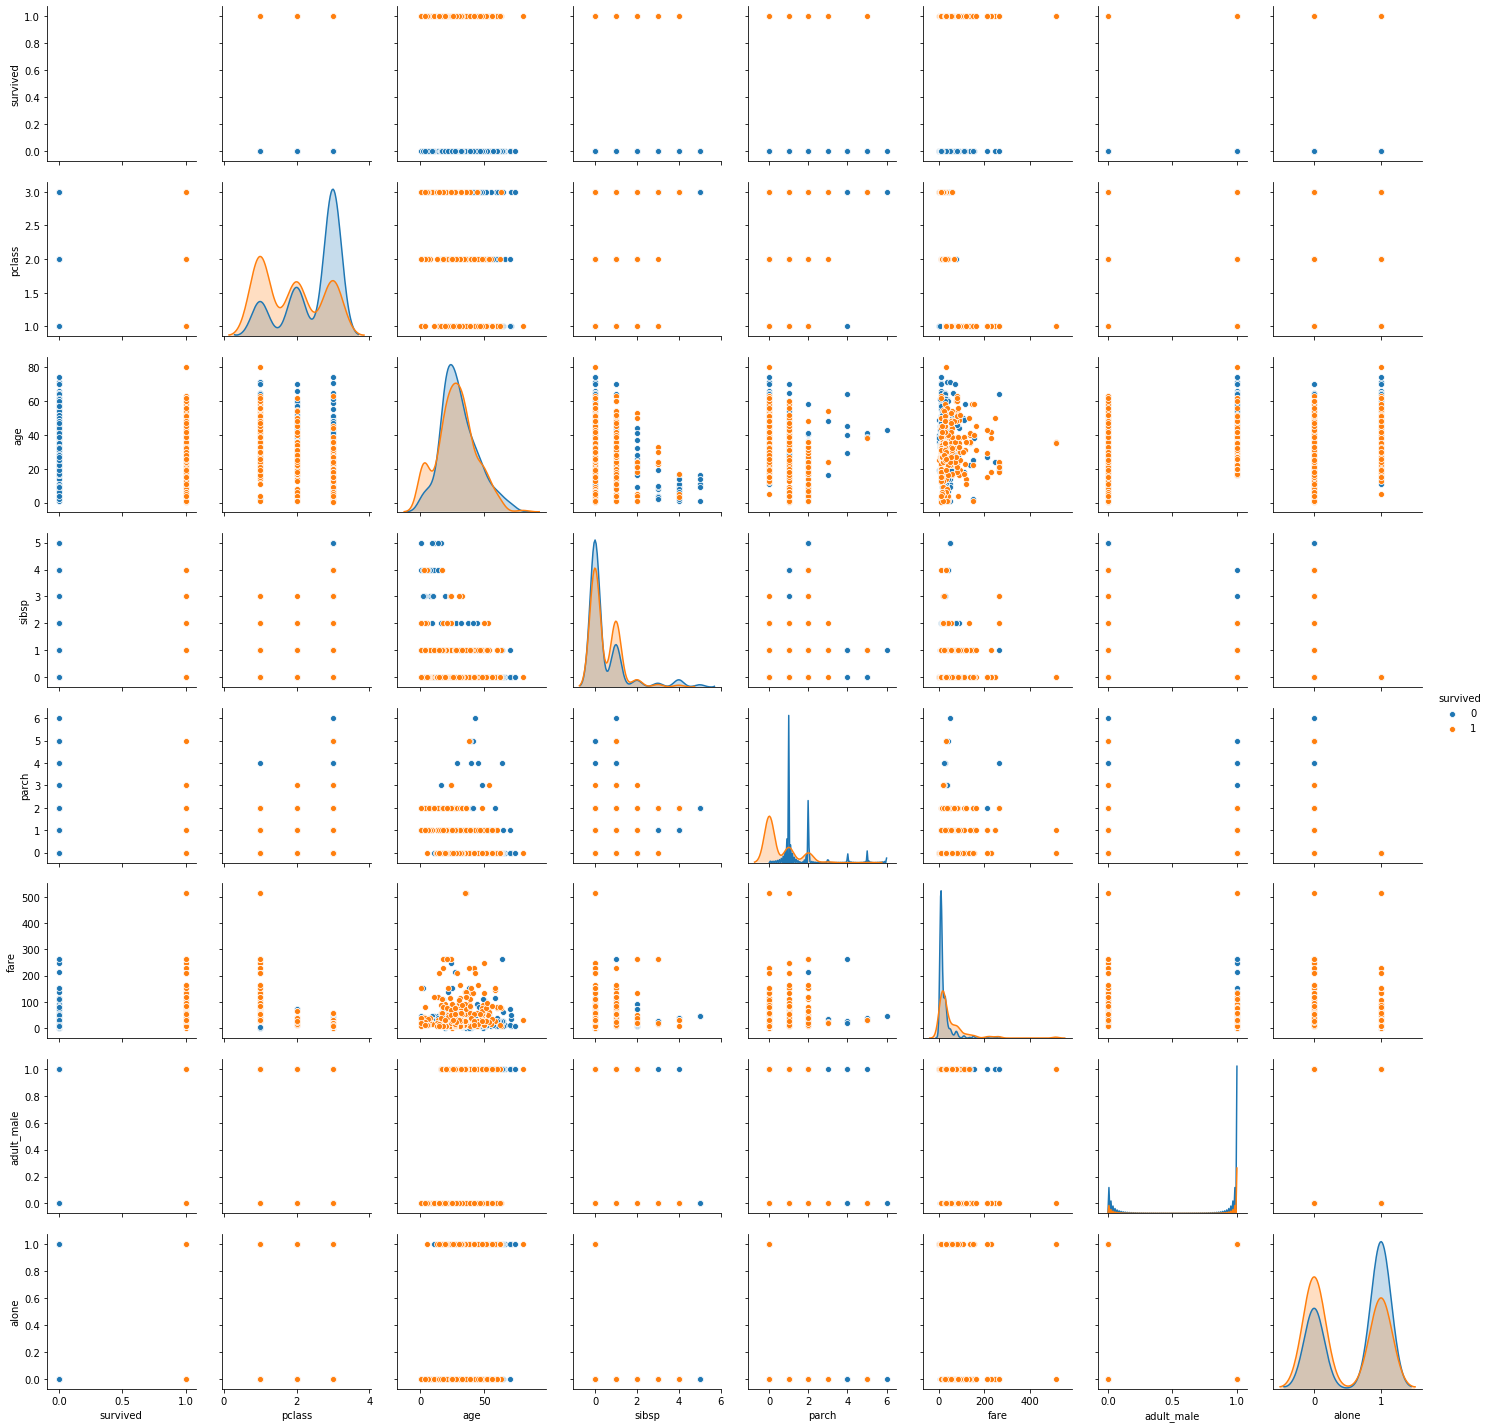

In [23]:
titanic_n = titanic[pd.notnull(titanic['age'])]

sns.pairplot(data=titanic_n, hue="survived")

b) Where age is not null, create a bar plot of survival and age grouping according to defined ranges of age for child, younger adult, adult, older adult (you can pick the age ranges yourself, but they should be clear in the code)

In [38]:
## group by the age
age_labels = ['0-19', '20-39','40-59', '60-79']
age = pd.cut(titanic_n.age, range(0, 81, 20), right=False, labels=age_labels)

age.head

<bound method NDFrame.head of 0      20-39
1      20-39
2      20-39
3      20-39
4      20-39
       ...  
885    20-39
886    20-39
887     0-19
889    20-39
890    20-39
Name: age, Length: 714, dtype: category
Categories (4, object): [0-19 < 20-39 < 40-59 < 60-79]>

In [40]:
##add age group information to titanic
titanic_agey=pd.merge(titanic_n, age,left_index=True, right_index=True)
titanic_agey.head

<bound method NDFrame.head of      survived  pclass     sex  age_x  sibsp  parch     fare embarked   class  \
0           0       3    male   22.0      1      0   7.2500        S   Third   
1           1       1  female   38.0      1      0  71.2833        C   First   
2           1       3  female   26.0      0      0   7.9250        S   Third   
3           1       1  female   35.0      1      0  53.1000        S   First   
4           0       3    male   35.0      0      0   8.0500        S   Third   
..        ...     ...     ...    ...    ...    ...      ...      ...     ...   
885         0       3  female   39.0      0      5  29.1250        Q   Third   
886         0       2    male   27.0      0      0  13.0000        S  Second   
887         1       1  female   19.0      0      0  30.0000        S   First   
889         1       1    male   26.0      0      0  30.0000        C   First   
890         0       3    male   32.0      0      0   7.7500        Q   Third   

       wh

In [52]:
titanic_age=titanic_agey.groupby('age_y')['survived'].value_counts()
titanic_age=pd.DataFrame(data=titanic_age)
titanic_age.rename(columns={titanic_age.columns[0]:"count"},inplace =True)
titanic_age.reset_index(level=['age_y','survived'], inplace=True)
titanic_age.head

<bound method NDFrame.head of    age_y  survived  count
0   0-19         0     85
1   0-19         1     79
2  20-39         0    237
3  20-39         1    150
4  40-59         0     83
5  40-59         1     54
6  60-79         0     19
7  60-79         1      6>

In [58]:
## rename the element of age group
titanic_age['age_y']=titanic_age['age_y'].replace({'0-19': 'child', '20-39': 'younger adult', '40-59': 'adult', '60-79': 'older adult'})
titanic_age

,age_y,survived,count
0,child,0,85
1,child,1,79
2,younger adult,0,237
3,younger adult,1,150
4,adult,0,83
5,adult,1,54
6,older adult,0,19
7,older adult,1,6


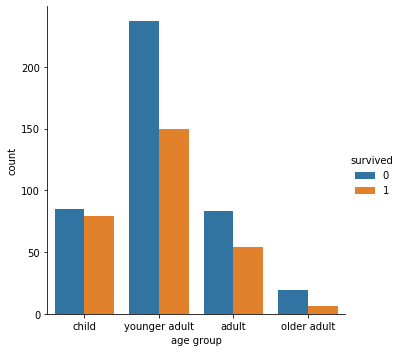

In [60]:
ax=sns.catplot(data=titanic_age,x="age_y",y="count",hue="survived",kind="bar")
## set x label
ax.set(xlabel='age group')

c) 2 other things 
### 1. Which social class had a better chance of survival?

In [98]:
## get the propotion of survived for each class
titanic_class = pd.crosstab(titanic['survived'],titanic['class'])
titanic_classp=titanic.groupby('class').survived.mean()
titanic_class = pd.crosstab(titanic['survived'],titanic['class'])
titanic_classp=pd.DataFrame(data=titanic_classp)
titanic_classp.rename(columns={titanic_classp.columns[0]:"survived prcentage"},inplace =True)
titanic_classp=titanic_classp.reset_index( )

titanic_classp

,class,survived prcentage
0,First,0.629630
1,Second,0.472826
2,Third,0.242363


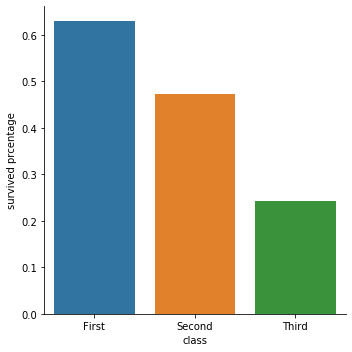

In [100]:
sns.catplot(data=titanic_classp,x="class",y="survived prcentage",kind="bar")

### 2.age distribution in different class

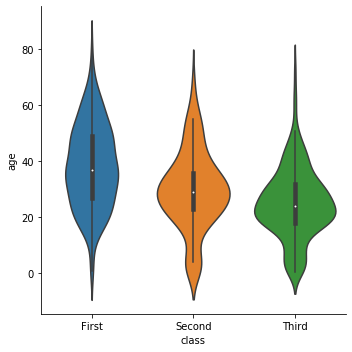

In [101]:
sns.catplot(data=titanic_n ,y="age",x="class",kind="violin")